In [4]:
from gettext import install
import pandas as pd
%pip install matplotlib seaborn

data = pd.read_csv("../data/posts_hashtags_selected_columns.csv")

Note: you may need to restart the kernel to use updated packages.


In [5]:
data

,id,bucketUrl,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,...,shareCount,playCount,collectCount,commentCount,isSponsored,hashtag_name,hashtag_title,searchHashtag_name,searchHashtag_views,location_address
0,7472461334404238614,https://storage.cloud.google.com/capstone-soci...,Straffer Hals mit diesen Schritten 👍 #halsfalt...,de,2025-02-17T18:46:26.000Z,False,Face Fitness Anti Aging,Falten Frei ohne Botox\r\nAnti Aging mit eigen...,233400,112,...,15,6113,121,1,False,halsfalten,NaN,hautpflege,2700000000,"Marienplatz, 80331 München, Germany"
1,7472461334404238614,https://storage.cloud.google.com/capstone-soci...,Straffer Hals mit diesen Schritten 👍 #halsfalt...,de,2025-02-17T18:46:26.000Z,False,Face Fitness Anti Aging,Falten Frei ohne Botox\r\nAnti Aging mit eigen...,233400,112,...,15,6113,121,1,False,hautpflege,NaN,hautpflege,2700000000,"Marienplatz, 80331 München, Germany"
2,7472461334404238614,https://storage.cloud.google.com/capstone-soci...,Straffer Hals mit diesen Schritten 👍 #halsfalt...,de,2025-02-17T18:46:26.000Z,False,Face Fitness Anti Aging,Falten Frei ohne Botox\r\nAnti Aging mit eigen...,233400,112,...,15,6113,121,1,False,facefitness,NaN,hautpflege,2700000000,"Marienplatz, 80331 München, Germany"
3,7472533937667968278,https://storage.cloud.google.com/capstone-soci...,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17T23:28:17.000Z,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \r\nat ...,32,10,...,1,940,2,2,False,appointment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany"
4,7472533937667968278,https://storage.cloud.google.com/capstone-soci...,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17T23:28:17.000Z,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \r\nat ...,32,10,...,1,940,2,2,False,treatment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12266,7459833919379131678,NaN,#fypシ #skincare #skincareroutine #storytimes #...,un,2025-01-14T18:05:53.000Z,False,Alchemy,NaN,35900,60,...,94,277200,594,75,False,tiktok,NaN,skincareroutine,155600000000,NaN
12267,7335544341332643118,NaN,My mom rates my skincare routine👀🥴,en,2024-02-14T19:39:09.000Z,False,Theresa Krug,✨Lifestyle • DIY • Skincare/Makeup✨\r\nFlorida...,2900000,60,...,18,162100,738,58,False,NaN,NaN,skincareroutine,155600000000,NaN
12268,7456398001754443030,NaN,5-step rice skincare 🍚🤍 @anua_global Rice Enzy...,en,2025-01-05T11:52:32.000Z,False,blueyoobin,🦋\r\nkoreanskincare with me\r\n🇰🇷📍Paris\r\nyoo...,58900,22,...,15700,7500000,125800,3247,False,NaN,NaN,skincareroutine,155600000000,NaN
12269,7456398001754443030,NaN,5-step rice skincare 🍚🤍 @anua_global Rice Enzy...,en,2025-01-05T11:52:32.000Z,False,blueyoobin,🦋\r\nkoreanskincare with me\r\n🇰🇷📍Paris\r\nyoo...,58900,22,...,15700,7500000,125800,3247,False,NaN,NaN,skincareroutine,155600000000,NaN


In [6]:
# general overview
print("\n📏 Columns & data types:")
print(data.info())

print("\n📊 Statistical overview (numerical):")
print(data.describe())


📏 Columns & data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12271 entries, 0 to 12270
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   12271 non-null  int64 
 1   bucketUrl            1350 non-null   object
 2   text                 12192 non-null  object
 3   textLanguage         12271 non-null  object
 4   createTimeISO        12271 non-null  object
 5   isAd                 12271 non-null  bool  
 6   author_nickName      12271 non-null  object
 7   author_signature     11640 non-null  object
 8   author_fans          12271 non-null  int64 
 9   video_duration       12271 non-null  int64 
 10  diggCount            12271 non-null  int64 
 11  shareCount           12271 non-null  int64 
 12  playCount            12271 non-null  int64 
 13  collectCount         12271 non-null  int64 
 14  commentCount         12271 non-null  int64 
 15  isSponsored          12271 n

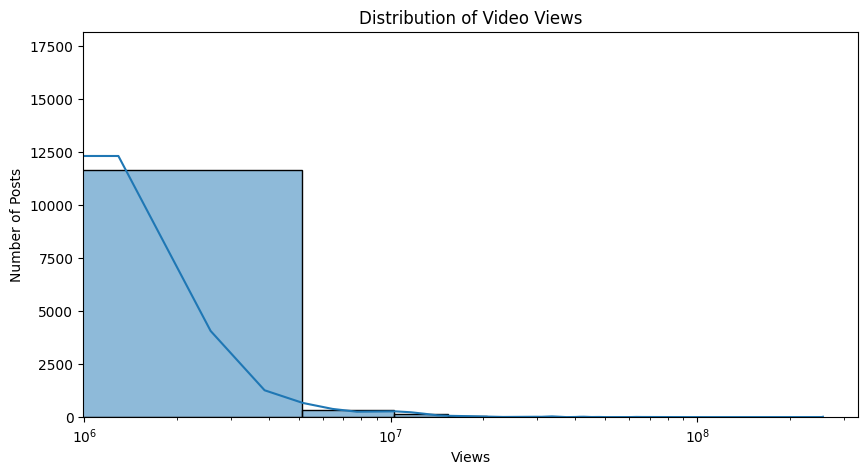

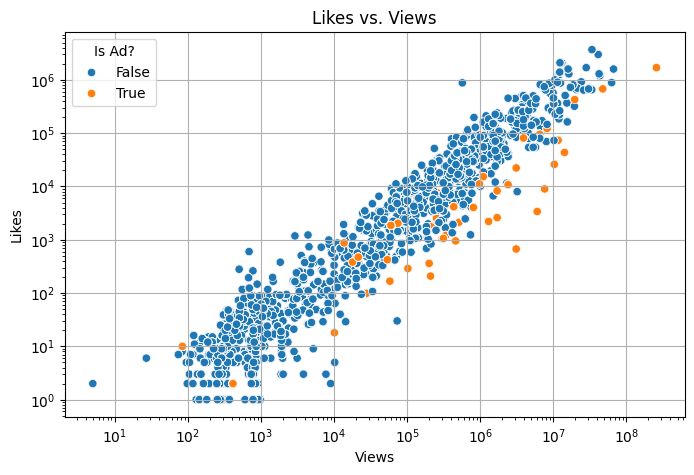

C:\Users\Surface\AppData\Local\Temp\ipykernel_9988\1217022479.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette="viridis")


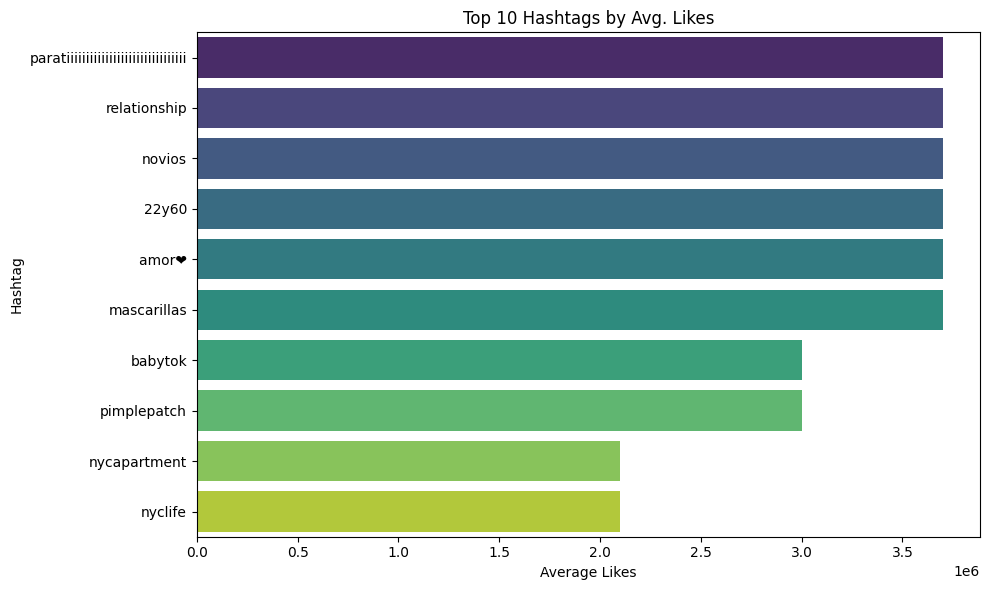

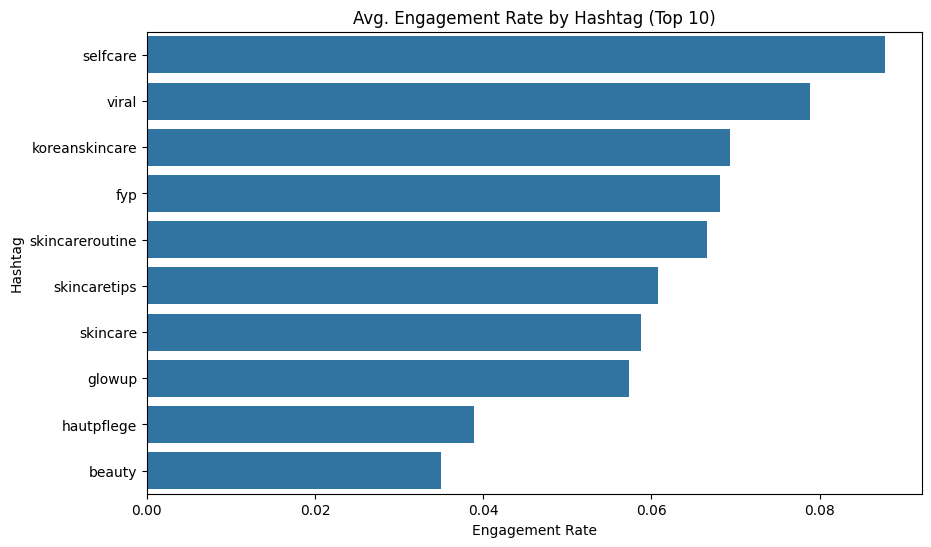

In [7]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Engagement rate calculation
data["engagement_rate"] = (data["diggCount"] + data["commentCount"] + data["shareCount"]) / data["playCount"]

# --- 1. Distribution of views ---
plt.figure(figsize=(10, 5))
sns.histplot(data["playCount"], bins=50, kde=True)
plt.title("Distribution of Video Views")
plt.xlabel("Views")
plt.ylabel("Number of Posts")
plt.xscale("log")  # optional, for better scaling
plt.show()

# --- 2. Correlation between views and likes (diggCount) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="playCount", y="diggCount", hue="isAd")
plt.title("Likes vs. Views")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.xscale("log")
plt.yscale("log")
plt.legend(title="Is Ad?")
plt.grid(True)
plt.show()

# --- 3. Top 10 Hashtags by Average Likes ---
top_hashtags = data.groupby("hashtag_name")["diggCount"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette="viridis")
plt.title("Top 10 Hashtags by Avg. Likes")
plt.xlabel("Average Likes")
plt.ylabel("Hashtag")
plt.tight_layout()
plt.show()

# --- 4. Engagement rate by hashtag (top 10 by volume) ---
top_used_hashtags = (
    data["hashtag_name"]
    .value_counts()
    .head(10)
    .index
)

engagement_by_hashtag = (
    data[data["hashtag_name"].isin(top_used_hashtags)]
    .groupby("hashtag_name")["engagement_rate"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_hashtag.values, y=engagement_by_hashtag.index)
plt.title("Avg. Engagement Rate by Hashtag (Top 10)")
plt.xlabel("Engagement Rate")
plt.ylabel("Hashtag")
plt.show()

In [8]:
%pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring to each post
def get_sentiment_scores(text):
    if pd.isna(text):
        return pd.Series([0, 0, 0, 0])
    scores = analyzer.polarity_scores(str(text))
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

data[['sent_neg', 'sent_neu', 'sent_pos', 'sent_compound']] = data['text'].apply(get_sentiment_scores)

Note: you may need to restart the kernel to use updated packages.


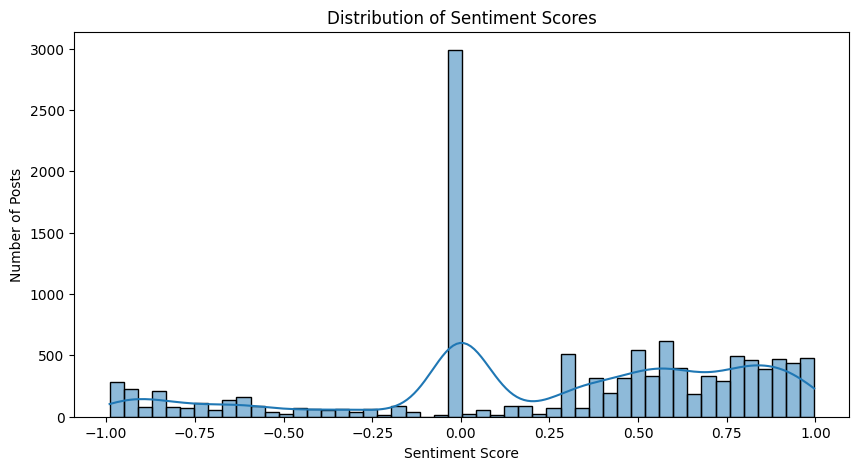

In [9]:
# sentiment distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(data['sent_compound'], bins=50, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Posts")
plt.show()

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt', force=True)
print(nltk.data.path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surface\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Surface\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data]   Unzipping tokenizers\punkt.zip.


['C:\\Users\\Surface/nltk_data', 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\Surface\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [16]:
from nltk.tokenize import word_tokenize

sample = "This is a test sentence!"
tokens = word_tokenize(sample)
print(tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Surface/nltk_data'
    - 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Surface\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [15]:
# tokenize and clean text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

stop_words = set(stopwords.words('english') + stopwords.words('german'))

def clean_and_tokenize(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Zäöüß ]", "", text)  # Remove symbols
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Apply to all texts and flatten into one list
all_words = data["text"].dropna().apply(clean_and_tokenize).sum()

# Count keywords
word_counts = Counter(all_words).most_common(20)

# Plot keywords
words, counts = zip(*word_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Keywords in Texts")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.show()


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Surface/nltk_data'
    - 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Surface\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Surface\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
